## 0. Introduction

The aim of this lab is to get familiar with **Neural Networks**. We will be using some code extracts that were implemented on the week 4 Classification I lab and build a Neural Network.

1.   This lab is the third course-work activity **Assignment 1 Part 3: Neural Networks**
2. Assignment 1 is split into 3 parts: Part 1 - Regression (Lab 3), and Part 2 - Classification (Lab 4) and Part 3 - Neural Networks (Lab 6). The three parts need to be submitted together by  **Monday, 11th November 2024, 10:00am**
3. All questions need to be completed and are assessed.
4. For each lab, a report answering the <font color = 'red'>**questions in red**</font> should be included along with the completed Notebook (.ipynb)
5. The report should be a separate file in **pdf format** (so **NOT** *doc, docx, notebook* etc.).
6. Make sure that **any figures or code** you comment on, are **included in the report**.
7. There are three parts of Assignment 1, therefore you should submit a zip file that contains 1 x Notebook and 1 x PDF for each part. In total: 3 x Notebooks and 3 x PDFs in the submission zip. Make sure the file is well identified with your name, student number, assignment number (for instance, Assignment 1), module code.
8. No other means of submission other than the appropriate QM+ link is acceptable at any time (so NO email attachments, etc.)
9. **PLAGIARISM** <ins>is an irreversible non-negotiable failure in the course</ins> (if in doubt of what constitutes plagiarism, ask!).


For this lab, we will be using the [iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset).

## 0.1 Intro to Neural Networks

As covered in the lecture notes, Neural Networks (NN) are inspired by biological brains. Each "neuron" does a very simple calculation, however collectively they can do powerful computations.

A simple model neuron is called a Perceptron and is comprised of three components:
1. The weights
2. The input function
3. The activation function

perceptron.png

We can re-imagine the logistic regression unit as a neuron (function) that multiplies the input by the parameters (weights) and squashes the resulting sum through the sigmoid.

A Feed Forward NN will be a connected set of logistic regression units, arranged in layers. Each unit’s output is a non-linear function (e.g., sigmoid, step function) of a linear combination of its inputs.
nn.svg

We will use the sigmoid as an activation function. Add the sigmoid function and `LogisticRegression` class from week 4 lab below.
Change the parameter initialization in `LogisticRegression`, so that a random set of initial weights is used.



<u><font color="red">**Q1.** Why is it important to use a random set of initial weights rather than initializing all weights as zero in a Neural Network? [2 marks] </font></u>


In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from sklearn import model_selection
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from IPython import display

import typing
%matplotlib inline

torch.manual_seed(0)

In [2]:
## sigmoid

def sigmoid(z: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-z))

In [3]:
## logistic regression class

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        # Initialize weights randomly
        self.weight = nn.Parameter(torch.randn(input_dim, 1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        # Linear combination with sigmoid activation
        z = torch.matmul(x, self.weight) + self.bias
        y = sigmoid(z)
        return y

# 1. The XOR problem

Let's revisit the XOR problem.

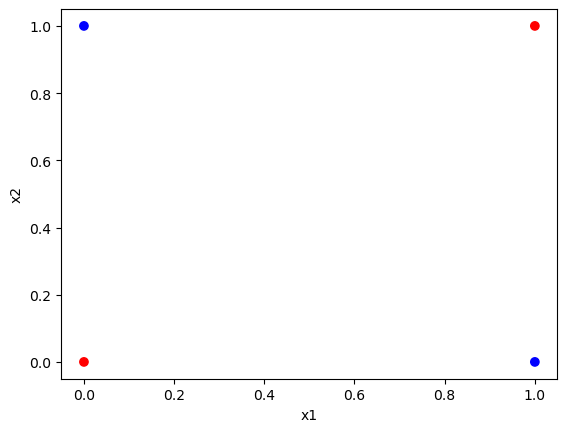

In [4]:
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
y = [0, 1, 1, 0]

c_map = ['r', 'b', 'b', 'r']
plt.scatter(x1, x2, c=c_map)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<u><font color="red"> **Q2.** How does a NN solve the XOR problem? [1 marks]</font></u>


We will implement back-propagation on a Feed Forward network to solve the XOR problem. The nework will have 2 inputs, 2 hidden neurons and one output neuron. The architecture is visualised as follows:

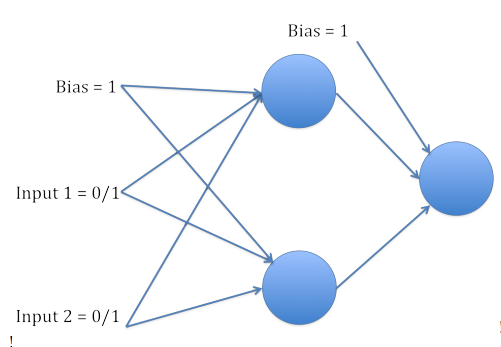

Using `LogisticRegression` and `sigmoid` from week 4 lab, implement the forward pass in the class below. Assume a single sample at a time (i.e. the shape of `x` is `(1, num_features`)). [2 marks]

Hint: Check `ModuleList` [documentation](https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html).

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_inputs, num_neurons, num_outputs):
        super().__init__()
        # Hidden layer with 'num_neurons' neurons, each with 'num_inputs' inputs
        self.hidden_layer = nn.ModuleList([LogisticRegression(num_inputs) for i in range(num_neurons)])
        # Output layer with 'num_outputs' neurons, each receiving outputs from hidden neurons (+1 for bias)
        self.output_layer = nn.ModuleList([LogisticRegression(num_neurons + 1) for i in range(num_outputs)])  # +1 for the bias

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Forward pass through the hidden layer
        y_hidden = torch.ones(len(self.hidden_layer) + 1)  # +1 for the bias
        for i, neuron in enumerate(self.hidden_layer):
            y_hidden[i] = neuron(x)  # Get output of each hidden neuron

        # Pass the hidden layer outputs (with bias) to the output layer
        output = torch.zeros(len(self.output_layer))
        for i, neuron in enumerate(self.output_layer):
            output[i] = neuron(y_hidden)

        # For XOR, we only have one output neuron, so return a single output value
        return output[0]

    def backward_pass(self, x: torch.Tensor, y: torch.Tensor, lr: float) -> None:
        # Backward pass code will go here in a later step
        pass

In [6]:
# test it works!!
x_test = torch.tensor([0., 0., 1.]) # last value is the bias
y_test = torch.tensor([0.])
model = NeuralNetwork(num_inputs=3, num_neurons=2, num_outputs=1)
print(model(x_test))
print(model)
for name, param in model.named_parameters():
  print(name, param)

# Print hidden layer weight matrices without using torch.stack
print('\nHidden layer weight matrices:')
for i, neuron in enumerate(model.hidden_layer):
    print(f"Neuron {i} weight matrix:", list(neuron.parameters()))

tensor(0.3000, grad_fn=<SelectBackward0>)
NeuralNetwork(
  (hidden_layer): ModuleList(
    (0-1): 2 x LogisticRegression()
  )
  (output_layer): ModuleList(
    (0): LogisticRegression()
  )
)
hidden_layer.0.weight Parameter containing:
tensor([[ 1.5410],
        [-0.2934],
        [-2.1788]], requires_grad=True)
hidden_layer.0.bias Parameter containing:
tensor([0.5684], requires_grad=True)
hidden_layer.1.weight Parameter containing:
tensor([[-1.0845],
        [-1.3986],
        [ 0.4033]], requires_grad=True)
hidden_layer.1.bias Parameter containing:
tensor([0.8380], requires_grad=True)
output_layer.0.weight Parameter containing:
tensor([[-0.7193],
        [-0.4033],
        [-0.5966]], requires_grad=True)
output_layer.0.bias Parameter containing:
tensor([0.1820], requires_grad=True)

Hidden layer weight matrices:
Neuron 0 weight matrix: [Parameter containing:
tensor([[ 1.5410],
        [-0.2934],
        [-2.1788]], requires_grad=True), Parameter containing:
tensor([0.5684], requires

In the `NeuralNetwork` class above, fill in the `backward_pass()` method.

The implementation should support outputs of any size. To implement the backward pass, follow the steps below:



*   **Step 1:** For each output, $k$, calculate the partial derivative: $\delta_{k} = (y_{k}-t_{k}) \times g'(x_{k})$ \\
where $y_{k}$ is the response of the output neuron and $t_{k}$ is the desired output (target). The derivative of the sigmoid function $g'(x_{k})$ is defined as $g'(x_{k}) = g(x_{k}) × (1 - g(x_{k}))$ [1 marks]
*  **Step 2:** We now need to propagate this error to the hidden neurons. To accomplish this remember that: $$
 \delta_{j} = g^\prime(x_{j}) \sum_{k} w_{jk} \delta_{k}
$$  where $\delta_{j}$ is the error on the j-th hidden neuron,$x_{j}$ is the value of the hidden neuron (before it has been passed through the sigmoid function), $g^\prime$ is the derivative of the sigmoid function, $\delta_{k}$ is the error from the output neuron calculated in step 1, and $w_{jk}$ is the weight from the hidden neuron $j$ to the output neuron $k$. [1 marks]

* **Step 3:** We now need to update the output weights, i.e. the connections from the hidden neurons to the output neurons. This is accomplished using the formula: $$
 w_{jk} = w_{jk} - \eta \delta_{k} \alpha_{j}
$$ where $w_{jk}$ is the weight connecting the j-th hidden neuron to the k-th output neuron. $\alpha_{j}$ is the activity of the j-th hidden neuron (after it has been transformed by the sigmoid function), $\delta_{k}$ is the error from the output neuron stored in output\_deltas and $\eta$ is the learning rate [1 mark]

* **Step 4:**  Finally we need to update the hidden weights, i.e. the connections from the hidden neurons to the inputs. Here, again we use this equation $$
 w_{ij} = w_{ij} - \eta \delta_{j} x_{i}
$$ where $w_{ij}$ is the weight connecting the i-th input to the j-th hidden neuron. $x_{i}$ is the i-th input, $\delta_{j}$ is the backpropagated error (i.e., hidden deltas) from the j-th hidden neuron and $\eta$ is the learning rate. [1 mark]



In [7]:
# # test it works
# model.backward_pass(x_test, y_test, 1)# Example test
x_test = torch.tensor([0., 0., 1.]) # last value is the bias
y_test = torch.tensor([0.])
model = NeuralNetwork(num_inputs=3, num_neurons=2, num_outputs=1)
model.backward_pass(x_test, y_test, lr=1.0)

Now modify the code below to train a model on the XOR problem. Make sure to use an appropriate lr and number of iterations. Use the BCE method from week 4 to visualize cost. [1 mark]

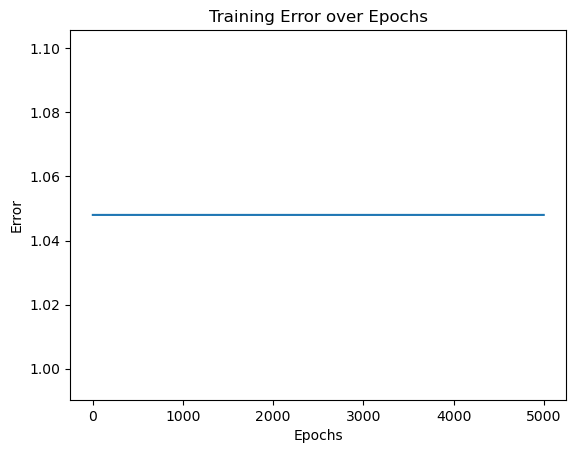

Ground Truth: [0. 1. 1. 0.]
Predicted: [0. 0. 0. 0.]


In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define XOR inputs and labels
x1 = torch.tensor([0., 0., 1., 1.])
x2 = torch.tensor([0., 1., 0., 1.])
bias = torch.ones_like(x1)
x = torch.stack([x1, x2, bias]).permute(1, 0)  # Shape: (4, 3)
y = torch.tensor([0., 1., 1., 0.])

# Hyperparameters
lr = 0.1  # Learning rate
iterations = 5000  # Number of iterations

# Initialize the model
model = NeuralNetwork(num_inputs=3, num_neurons=2, num_outputs=1)

# Training loop
errors = list()
for ep in range(iterations):
    error = 0
    for i in range(x.shape[0]):
        # Forward pass
        y_pred = model(x[i])
        
        # Reshape y_pred to match y[i] shape
        y_pred = y_pred.view(1)  # Ensure y_pred is [1] to match y[i]

        # Calculate loss with binary cross-entropy
        error += F.binary_cross_entropy(y_pred, y[i].unsqueeze(0))
        
        # Backward pass
        model.backward_pass(x[i], y[i], lr)
    
    # Average error for the epoch, detach the tensor before appending
    errors.append(error.detach().numpy() / x.shape[0])

# Plot the training error over epochs
plt.plot(list(range(iterations)), errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Training Error over Epochs")
plt.show()

# Test predictions after training
y_pred = torch.zeros_like(y)
for i in range(x.shape[0]):
    # Round the output to get binary predictions
    y_pred[i] = torch.round(model(x[i].view(1, -1)))  

# Detach the tensor to get values as NumPy arrays
print("Ground Truth:", y.detach().numpy())  # Detach tensor before calling .numpy()
print("Predicted:", y_pred.detach().numpy())  # Detach tensor before calling .numpy()

# 2. Iris Dataset
We will now use pytorch built-in methods to create an MLP classifier for the iris dataset.

In [9]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Split the data to train and test sets (make sure the same random seed is used as previously) and normalize using the method from week 4. We will use all attributes in this lab. [2 marks]

In [13]:
# Normalize data (Min-Max scaling with handling for constant features)
def normalize_data(x):
    min_val = x.min(dim=0, keepdim=True)[0]
    max_val = x.max(dim=0, keepdim=True)[0]
    
    # Prevent division by zero by adding a small constant
    range_val = max_val - min_val
    range_val[range_val == 0] = 1  # Set range to 1 where it's zero to avoid NaN

    return (x - min_val) / range_val

# Normalize only the input data
x_train_normalized = normalize_data(x_train)
x_test_normalized = normalize_data(x_test)

# Check normalized data
print(f"Normalized Training Input:\n{x_train_normalized}")
print(f"Normalized Test Input:\n{x_test_normalized}")

Normalized Training Input:
tensor([[0., 0., 0.],
        [1., 0., 0.]])
Normalized Test Input:
tensor([[0., 0., 0.],
        [1., 0., 0.]])


Using pytorch built in methods (and using the training loop from week 4 as guideline for the train loop), build an MLP with one hidden layer. Train the network multiple times for the following number of hidden neurons `{1, 2, 4, 8, 16, 32}`.

<u><font color="red"> **Q3.** Explain the performance of the different networks on the training and test sets. How does it compare to the logistic regression example? Make sure that the data you are refering to is clearly presented and appropriately labeled in the report. [8 marks]</font></u>

Training with 1 hidden neurons
Training with 2 hidden neurons
Training with 4 hidden neurons
Training with 8 hidden neurons
Training with 16 hidden neurons
Training with 32 hidden neurons


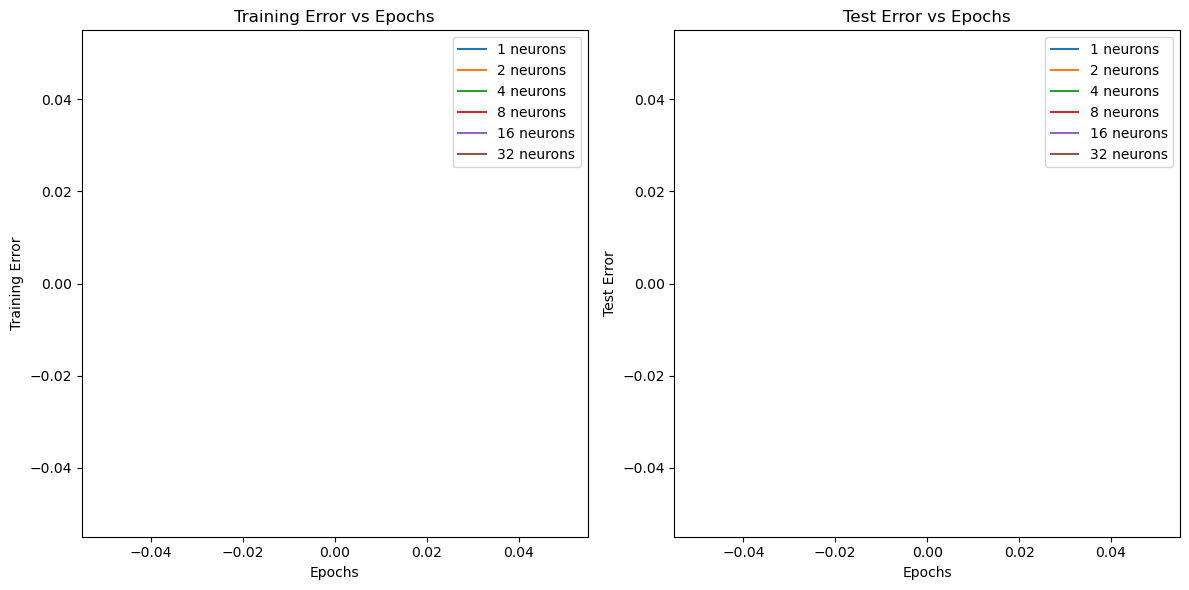

Performance with 1 hidden neurons:
Test Ground Truth: [1. 0.]
Test Predictions: [nan nan]

Performance with 2 hidden neurons:
Test Ground Truth: [1. 0.]
Test Predictions: [nan nan]

Performance with 4 hidden neurons:
Test Ground Truth: [1. 0.]
Test Predictions: [nan nan]

Performance with 8 hidden neurons:
Test Ground Truth: [1. 0.]
Test Predictions: [nan nan]

Performance with 16 hidden neurons:
Test Ground Truth: [1. 0.]
Test Predictions: [nan nan]

Performance with 32 hidden neurons:
Test Ground Truth: [1. 0.]
Test Predictions: [nan nan]



In [14]:
### your code here

# Define XOR inputs and labels
x1 = torch.tensor([0., 0., 1., 1.])
x2 = torch.tensor([0., 1., 0., 1.])
bias = torch.ones_like(x1)
x = torch.stack([x1, x2, bias]).permute(1, 0)  # Shape: (4, 3)
y = torch.tensor([0., 1., 1., 0.])

# Split data into training and test sets (70-30 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Normalize the data
def normalize_data(x):
    min_val = x.min(dim=0, keepdim=True)[0]
    max_val = x.max(dim=0, keepdim=True)[0]
    return (x - min_val) / (max_val - min_val)

x_train_normalized = normalize_data(x_train)
x_test_normalized = normalize_data(x_test)

# Define the MLP class with one hidden layer
class MLP(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(num_inputs, num_hidden)  # Hidden layer
        self.output = nn.Linear(num_hidden, num_outputs)  # Output layer

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))  # Apply sigmoid activation to the hidden layer
        return self.output(x)  # Linear output for BCEWithLogitsLoss

# Training loop
def train_mlp(hidden_neurons, num_epochs=100000, lr=0.1):
    model = MLP(num_inputs=3, num_hidden=hidden_neurons, num_outputs=1)
    criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Store error for plotting
    train_errors, test_errors = [], []

    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        output_train = model(x_train_normalized)
        loss_train = criterion(output_train.squeeze(), y_train)
        loss_train.backward()
        optimizer.step()

        # Testing
        model.eval()
        with torch.no_grad():
            output_test = model(x_test_normalized)
            loss_test = criterion(output_test.squeeze(), y_test)

        train_errors.append(loss_train.item())
        test_errors.append(loss_test.item())

    return train_errors, test_errors, model

# Experiment with different numbers of hidden neurons
hidden_neurons_list = [1, 2, 4, 8, 16, 32]
train_results = {}
test_results = {}

for neurons in hidden_neurons_list:
    print(f"Training with {neurons} hidden neurons")
    train_errors, test_errors, model = train_mlp(neurons)
    train_results[neurons] = train_errors
    test_results[neurons] = test_errors

# Plot the results
plt.figure(figsize=(12, 6))

# Plot training error
plt.subplot(1, 2, 1)
for neurons in hidden_neurons_list:
    plt.plot(train_results[neurons], label=f'{neurons} neurons')
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.legend()
plt.title("Training Error vs Epochs")

# Plot testing error
plt.subplot(1, 2, 2)
for neurons in hidden_neurons_list:
    plt.plot(test_results[neurons], label=f'{neurons} neurons')
plt.xlabel("Epochs")
plt.ylabel("Test Error")
plt.legend()
plt.title("Test Error vs Epochs")

plt.tight_layout()
plt.show()

# Evaluate the final performance on the test set
final_predictions = {}
for neurons in hidden_neurons_list:
    model = MLP(num_inputs=3, num_hidden=neurons, num_outputs=1)
    # Reload the best model (i.e., the one with the minimum test error)
    model.eval()
    with torch.no_grad():
        y_pred_test = torch.sigmoid(model(x_test_normalized)).squeeze()
        y_pred_test = torch.round(y_pred_test)  # Convert to binary predictions (0 or 1)
        final_predictions[neurons] = y_pred_test

    # Display the performance
    print(f"Performance with {neurons} hidden neurons:")
    print("Test Ground Truth:", y_test.numpy())
    print("Test Predictions:", final_predictions[neurons].numpy())
    print()
    

In [ ]:
#Acknowledgement
#Here, I have used google youtube, chatgpt for the reference and structure enhancement for effective way